In [1]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('HousepriceTrain.csv')
test = pd.read_csv('HousepriceTest.csv')

In [3]:
train.head()

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,4,1316,1316,2,397,6,65.0,169990
1,4,2028,2028,2,880,7,88.0,369900
2,3,1072,1072,2,525,5,35.0,140000
3,3,1048,1048,2,286,6,72.0,135000
4,3,1779,1779,2,546,6,80.0,197900


In [4]:
test.head()

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,3,1839,1839,3,416,7,110.0,257500
1,3,2126,2126,2,538,7,0.0,185000
2,4,1709,1709,2,380,7,24.0,130000
3,3,1902,1902,2,539,8,68.0,112000
4,3,1072,1072,2,525,5,35.0,148000


In [7]:
#Splitting training and testing data
X_train,y_train = train.iloc[:,:7],train.iloc[:,7] #[:,:7] for all rows and all columns excluding last column and [:,7] includes all rows but only 7 column
X_train

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage
0,4,1316,1316,2,397,6,65.0
1,4,2028,2028,2,880,7,88.0
2,3,1072,1072,2,525,5,35.0
3,3,1048,1048,2,286,6,72.0
4,3,1779,1779,2,546,6,80.0
...,...,...,...,...,...,...,...
1087,3,1277,1277,2,526,5,85.0
1088,3,1152,1152,3,300,6,80.0
1089,3,1269,1269,2,308,6,70.0
1090,3,605,605,3,0,5,58.0


In [8]:
y_train

0       169990
1       369900
2       140000
3       135000
4       197900
         ...  
1087    167000
1088    158500
1089    155000
1090     86000
1091    176000
Name: SalePrice, Length: 1092, dtype: int64

In [9]:
X_test,y_test = test.iloc[:,:7],test.iloc[:,7]
X_test

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage
0,3,1839,1839,3,416,7,110.0
1,3,2126,2126,2,538,7,0.0
2,4,1709,1709,2,380,7,24.0
3,3,1902,1902,2,539,8,68.0
4,3,1072,1072,2,525,5,35.0
...,...,...,...,...,...,...,...
287,4,2868,2868,2,716,11,85.0
288,5,1414,1414,3,601,6,87.0
289,4,1456,1456,2,429,8,105.0
290,4,1502,1502,2,644,7,79.0


In [10]:
y_test

0      257500
1      185000
2      130000
3      112000
4      148000
        ...  
287    556581
288    176500
289    172785
290    233170
291     62383
Name: SalePrice, Length: 292, dtype: int64

In [12]:
train[:5]

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,4,1316,1316,2,397,6,65.0,169990
1,4,2028,2028,2,880,7,88.0,369900
2,3,1072,1072,2,525,5,35.0,140000
3,3,1048,1048,2,286,6,72.0,135000
4,3,1779,1779,2,546,6,80.0,197900


In [13]:
test[:5]

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,3,1839,1839,3,416,7,110.0,257500
1,3,2126,2126,2,538,7,0.0,185000
2,4,1709,1709,2,380,7,24.0,130000
3,3,1902,1902,2,539,8,68.0,112000
4,3,1072,1072,2,525,5,35.0,148000


In [15]:
#OLS: Independent variable: GarageArea, Target variable: SalePrice

def estimate_coef(x,y):
    
    # number of observations/points
    n = np.size(x)
    
    # mean of x and y vector
    xmean, ymean = np.mean(x), np.mean(y)
    
    # calculating cross-deviation and deviation about x
    ss_xy = np.sum(y*x)-xmean*ymean
    ss_xx = np.sum(x*x)-xmean*xmean
     
    #Calculate regression coefficients
    b_1 = ss_xy / ss_xx
    b_0 = ymean - xmean*b_1
    
    return(b_0,b_1)

(11791.402326640731, 354.55291036146815)


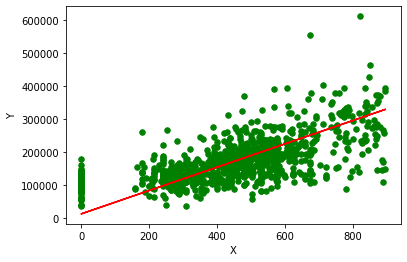

In [16]:
#Plotting regression line:

def plot_regression(x,y,b):
    
    # plotting the actual points as scatter plot
    plt.scatter(x,y, color='green', marker='o', s=30)
    
    # predicted response vector
    ypred = b[0] + b[1]*x
    
    #Plotting line
    plt.plot(x,ypred, color='red')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    
values = estimate_coef(X_train['GarageArea'], y_train)
print(values)

plot_regression(X_train['GarageArea'],y_train, values)

In [18]:
#Scikit learn library for LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

# instantiate linear model
linreg = LinearRegression()
# fit model on training data
linreg.fit(X_train, np.log(y_train))

# predict on test features
y_pred = linreg.predict(X_test)

In [21]:
#Mean squared error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, np.exp(y_pred))
print(mae)

29158.295036636522


In [22]:
#Root mean squared error

from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, np.exp(y_pred))
print(mse)

rmse = math.sqrt(mse)
print(rmse)

1835511414.830683
42842.86889122486


In [23]:
#R squared
from sklearn.metrics import r2_score

rsquared = r2_score(y_test, np.exp(y_pred))
print(rsquared)

0.7378446924962258
